<a href="https://colab.research.google.com/github/astromar2187/Kmeans/blob/KMeansV2_8dados_distManhattan_K3/KMeansV2_8dados_distManhattan_K3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas:

In [ ]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
import plotly.express as px

Criando o dataframe Pontos, com quatro colunas, uma referente a posição desse ponto no eixo X e outra referente a posição no eixo Y; também uma que armazene dados tipo booleano que indicará se o ponto é centróide ou não; por ultimo, uma coluna com dados indicando a qual cluster o ponto pertence:

In [ ]:
pontos = {'cord_x':[2,2,8,5,7,6,1,4], 
          'cord_y':[10,5,4,8,5,4,2,9], 
          'is_centrd':[True,False,False,True,False,False,True,False],
          'cluster':[0,2,1,1,1,1,2,1]}
df = pd.DataFrame(pontos)
df

,cord_x,cord_y,is_centrd,cluster
0,2,10,True,0
1,2,5,False,2
2,8,4,False,1
3,5,8,True,1
4,7,5,False,1
5,6,4,False,1
6,1,2,True,2
7,4,9,False,1


Criando a função que calculará a distancia (Manhattan) entre dois pontos quaisquer:

In [ ]:
def modulo(x):
  if(x>=0):
    return x
  else: 
    return -x

In [ ]:
def calcula_dist(a,b):
  d = modulo(a.x-b.x)+modulo(a.y-b.y)
  return d

Criando o array geral dos n pontos:

In [ ]:
Pontos = []

Gerando o gráfico base:

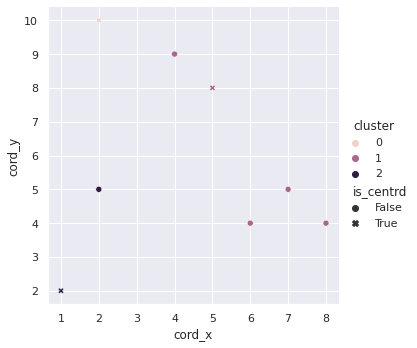

In [ ]:
from ipywidgets import widget_float
sns.relplot(data=df, x='cord_x', y='cord_y', hue='cluster', style='is_centrd')

Definindo quais, dentre esses pontos, serão os centróides (nessa versão os primeiros são fixos e pré-definidos):

Criando uma função que cria uma lista com os centroides, sejam os definidos inicialmente ou os próximos (A função limpa a lista de centroides a cada vez que for chamada):

In [ ]:
centroides = []

In [ ]:
def att_lista_centroides():
  centroides.clear()
  for p in Pontos:
    if(p.centroide==True):
      centroides.append(p)
      print(f'({p.x},{p.y})')

In [ ]:
att_lista_centroides()

(2,10)
(5,8)
(1,2)


Agora, criaremos uma lista com três listas, representando os três clusteres, que armazenarão os pontos de acordo com os calculos de distância.

In [ ]:
clust = [[], [], []]

Em seguida, separamos os pontos considerando qual centróide está mais perto de cada ponto.

In [ ]:
for ponto in Pontos:
  dist = []
  for c in centroides:
    d = calcula_dist(c, ponto)
    dist.append(d)
  print(dist)
  index = dist.index(min(dist))
  clust[index].append(ponto)
  ponto.cluster = index


[0, 5, 9]
[5, 6, 4]
[12, 7, 9]
[5, 0, 10]
[10, 5, 9]
[10, 5, 7]
[9, 10, 0]
[3, 2, 10]


In [ ]:
i = 0
for c in clust:
  print(f'cluster {i+1}')
  for ponto in c:
    print(f'({ponto.x},{ponto.y})')
  i=i+1

cluster 1
(2,10)
cluster 2
(8,4)
(5,8)
(7,5)
(6,4)
(4,9)
cluster 3
(2,5)
(1,2)
